## **Genetic Algorithm - Exercise**
*Ngày 12 tháng 10 năm 2024*

### **Exercise 1: Data Loading and Preprocessing**

In [738]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline


In [739]:
def load_data_from_file(fileName = "advertising.csv"):
  
  """
    Load and preprocess data from CSV file
  """
  
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :-1]
  sales_Y = data[:, -1]

  # **************** your code here ****************
  
  # Add bias term (1.0) to features
  ones = np.ones((features_X.shape[0], 1))
  features_X = np.hstack((ones, features_X))

  return features_X, sales_Y

In [740]:
features_X, sales_Y = load_data_from_file()

# Question 2:
print("First 5 rows of features:")
print(features_X[:5,:])

# Question 3:
print("\nShape of sales array:", sales_Y.shape)

First 5 rows of features:
[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]

Shape of sales array: (200,)


### **Exercise 2: Individual Creation**

In [741]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

  # **************** your code here ****************
  """
    Create a random individual with n genes within [-bound/2, bound/2]
  """

  individual = []
  for _ in range(n):
    gene = generate_random_value(bound = 10)
    individual.append(gene)

  return individual

In [742]:
individual = create_individual()
print("Sample individual:", individual)

Sample individual: [3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


### **Exercise 3: Fitness Function Implementation**

In [743]:
def compute_loss(individual):
    
    """
        Compute Mean Squared Error loss for an individual
    """

    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    # **************** your code here ****************
    """
        Compute fitness value from loss (higher is better)
    """

    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)  # Add 1 to avoid division by zero
    
    return fitness

In [744]:
# Question 4:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print("Fitness score:", fitness_score)

Fitness score: 1.0185991537088997e-06


### **Exercise 4: Crossover Implementation**

In [745]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    # **************** your code here ****************
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(individual1)-1)
        individual1_new[crossover_point:], individual2_new[crossover_point:] = \
            individual2_new[crossover_point:], individual1_new[crossover_point:]
    
    return individual1_new, individual2_new

In [746]:
# Question 5:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
new_ind1, new_ind2 = crossover(individual1, individual2, 2.0)
print("After crossover:")
print("Individual 1:", new_ind1)
print("Individual 2:", new_ind2)

After crossover:
Individual 1: [4.09, 4.82, -0.79, -2.41]
Individual 2: [3.44, 2.57, 3.1, 4.02]


### **Exercise 5: Mutation Implementation**

In [747]:
def mutate(individual, mutation_rate = 0.05):

    """
        Perform mutation on an individual
    """

    individual_m = individual.copy()

    # **************** your code here ****************
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            individual_m[i] += random.uniform(-1, 1)
    
    return individual_m

In [748]:
# Question 6:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate = 2.0)
print("Before mutation:", before_individual)
print("After mutation:", after_individual)

Before mutation: [4.09, 4.82, 3.1, 4.02]
After mutation: [4.749705807317983, 4.536098749389977, 2.5368854538304637, 3.299491569933357]


### **Exercise 6: Population Initialization**

In [749]:
def initializePopulation(m):
  
  """
    Initialize population with m individuals
  """

  population = [create_individual() for _ in range(m)]
  return population

### **Exercise 7: Selection Implementation**

In [750]:
def selection(sorted_old_population, m=100):

    """
        Tournament selection
    """

    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

### **Exercise 8: New Population Creation**

In [751]:
def create_new_population(old_population, elitism=2, gen=1):

    """
        Create new population using genetic operations
    """

    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        # **************** your code here ****************
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        child1, child2 = crossover(parent1, parent2)

        # mutation
        # **************** your code here ****************
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

        # copy elitism chromosomes that have best fitness score to the next generation
        # **************** your code here ****************
        new_population.extend(sorted_population[m-elitism:])


    return new_population, compute_loss(sorted_population[m-1])

In [752]:
# Question 7:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


### **Exercise 9: Complete GA Implementation**

In [753]:
def run_GA():

  """
    Run the complete Genetic Algorithm
  """

  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    # *********** your code here *************
    print(f"Generation {i + 1} has", end=" ")
    population, best_loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(best_loss)
  return population, losses_list

population, losses_list = run_GA()

Generation 1 has Best loss: 427.1376582497136 with chromsome:  [1.0759649914027647, -0.05514325854497848, 1.4414345400564477, -0.4133563756837555]
Generation 2 has Best loss: 427.1376582497136 with chromsome:  [1.0759649914027647, -0.05514325854497848, 1.4414345400564477, -0.4133563756837555]
Generation 3 has Best loss: 418.4638617233567 with chromsome:  [3.8947865393993286, -0.036550604580394275, 1.4414345400564477, -0.4133563756837555]
Generation 4 has Best loss: 383.9144029651432 with chromsome:  [1.0759649914027647, -0.05514325854497848, 1.0313772527843375, -0.4133563756837555]
Generation 5 has 

Best loss: 276.97603392752814 with chromsome:  [3.8947865393993286, -0.036550604580394275, 0.8825495338918441, -0.4133563756837555]
Generation 6 has Best loss: 210.72973178434324 with chromsome:  [1.0759649914027647, 0.05363894471709041, 1.0313772527843375, -0.4133563756837555]
Generation 7 has Best loss: 177.4899379813882 with chromsome:  [1.0759649914027647, 0.010146773932698583, 0.8825495338918441, -0.4133563756837555]
Generation 8 has Best loss: 26.948960731448114 with chromsome:  [1.0759649914027647, 0.05363894471709041, 0.2583896853950729, -0.12595366179943257]
Generation 9 has Best loss: 26.948960731448114 with chromsome:  [1.0759649914027647, 0.05363894471709041, 0.2583896853950729, -0.12595366179943257]
Generation 10 has Best loss: 11.65770454196941 with chromsome:  [4.217318545331228, 0.05363894471709041, 0.2583896853950729, -0.12595366179943257]
Generation 11 has Best loss: 11.65770454196941 with chromsome:  [4.217318545331228, 0.05363894471709041, 0.2583896853950729, -0.125

### **Exercise 10: Loss Visualization**

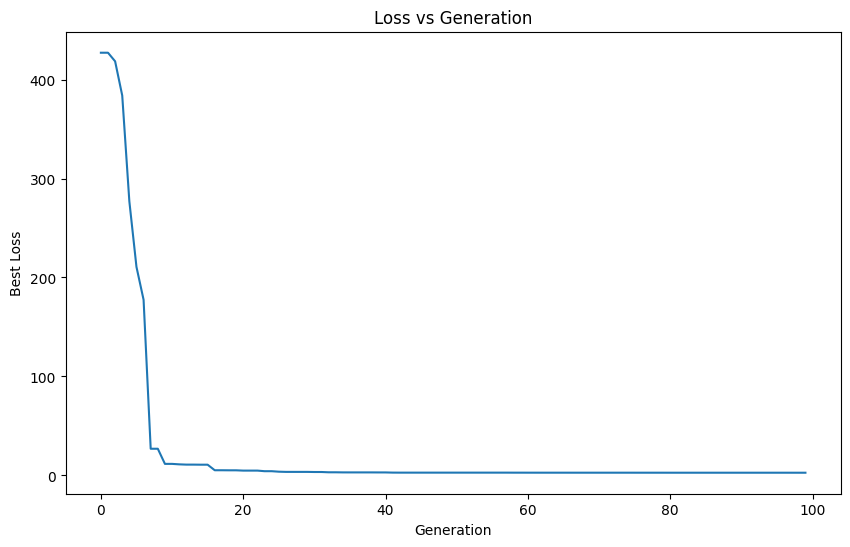

In [754]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
      """
            Visualize loss values over generations
      """
      # *********** your code here *************
      plt.figure(figsize=(10, 6))
      plt.plot(range(len(losses_list)), losses_list)
      plt.xlabel('Generation')
      plt.ylabel('Best Loss')
      plt.title('Loss vs Generation')
      plt.show()

visualize_loss(losses_list)

### **Exercise 11: Prediction Visualization**

[4.7416693444452545, 0.05363894471709041, 0.1131306916558783, -0.004408298600351523]


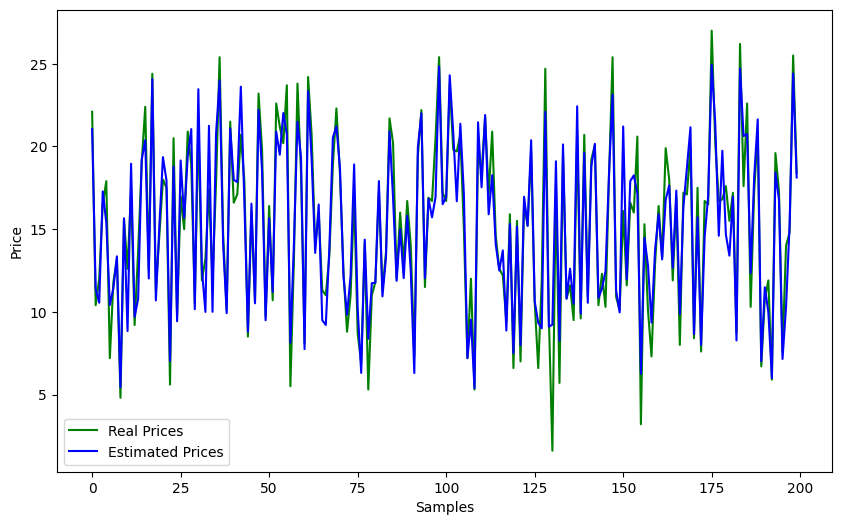

In [755]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    # ************* your code here *************
    price = np.dot(feature, theta)
    estimated_prices.append(price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.7416693444452545, 0.05363894471709041, 0.1131306916558783, -0.004408298600351523]


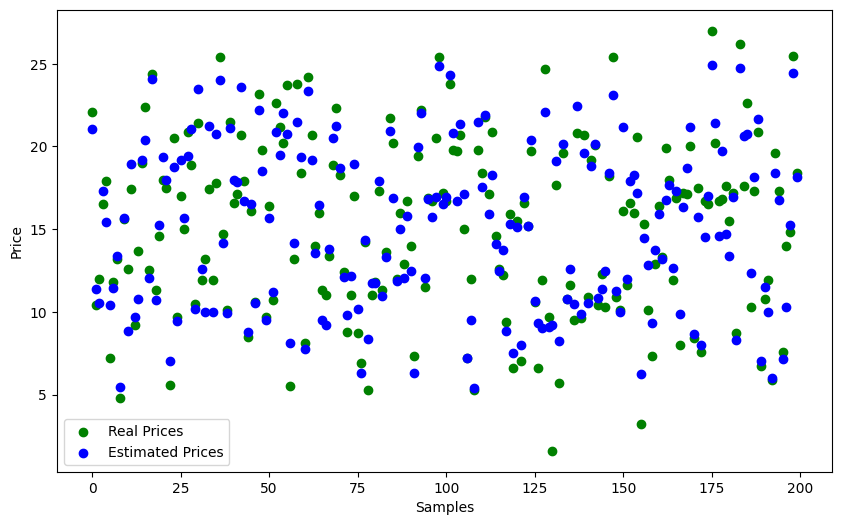

In [756]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()